# Creating simulation data

This notebook presents the steps to generate simulated dynamic connectivity data using the direct model
$$\mathbf{C} = \mathbf{D} \mathbf{A}$$
where $\mathbf{D}$ is the dictionary of FCU and $\mathbf{A}$ is the time courses of activations of the FCUs

# Note:
The creation of the dictionary $\mathbf{D}$ part was used to generate the results presented in the paper:

V. Portmann, C. Meillier, and V. Mazet, “Analyse de la dynamique
spatio-temporelle de la connectivité fonctionnelle cérébrale : données
synthétiques et modélisation.” GRETSI, 2023.

Copyright (c) 2024 University of Strasbourg
Author: Massyl Moudoud <mmoudoud@unistra.fr> 
Contributor(s) : Céline Meillier <meillier@unistra.fr>, Vincent Mazet <vincent.mazet@unistra.fr>

This work has been supported by the ANR project DynaSTI: ANR-22-CE45-0008

This software is governed by the CeCILL  license under French law and
abiding by the rules of distribution of free software.  You can  use, 
modify and/ or redistribute the software under the terms of the CeCILL
license as circulated by CEA, CNRS and INRIA at the following URL
"http://www.cecill.info". 

As a counterpart to the access to the source code and  rights to copy,
modify and redistribute granted by the license, users are provided only
with a limited warranty  and the software's author,  the holder of the
economic rights,  and the successive licensors  have only  limited
liability. 

In this respect, the user's attention is drawn to the risks associated
with loading,  using,  modifying and/or developing or reproducing the
software by the user in light of its specific status of free software,
that may mean  that it is complicated to manipulate,  and  that  also
therefore means  that it is reserved for developers  and  experienced
professionals having in-depth computer knowledge. Users are therefore
encouraged to load and test the software's suitability as regards their
requirements in conditions enabling the security of their systems and/or 
data to be ensured and,  more generally, to use and operate it in the 
same conditions as regards security. 

The fact that you are presently reading this means that you have had
knowledge of the CeCILL license and that you accept its terms.

In [1]:
#imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from skimage.restoration import denoise_tv_chambolle
import scipy as sp

# Define general properties

In [30]:
list_colors = ['darkcyan', 'darkorange', 'gold', 'saddlebrown', 'midnightblue', 'turquoise', 'darkviolet', 'mediumvioletred', 'gray', 'black', 'chartreuse']

In [31]:
#Number of ROIs
R = 10 
#Assign names to the ROIs (just numbers)
ROI_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#Number of time samples
T = 1000


#len_transition = 60
#lenW = 55


#place the ROIs in a circle for graph representations
position = {}
radius = 4

for i in range(R):
    position[ROI_name[i]] = [radius * np.cos(i*2*np.pi/R), radius * np.sin(i*2*np.pi/R)]

# Construct the dictionary $\mathbf{D}$
The dictionary $\mathbf{D}$ is constructed manually.
Each column encoded the pairs of ROI that compose the FCU and their correlation within the FCU.
FCUs are defined as networks and subnetworks.
Three netwroks  denoted 1 , 2 and 3 and some of their subnetwroks (denoted 1a, 1b, 2a, 2c...) are defined

### Define helper functions

In [32]:
def state_generator(R, li):
    """
    R : nb of ROIs
    li : list of list of size 3 : [ROI1, ROI2, correlation]
    """
    C = np.zeros((R,R))
    for l in li:
        ROI1 = l[0]
        ROI2 = l[1]
        coeff = l[2]
        C[ROI1, ROI2] = coeff
        C[ROI2, ROI1] = coeff
    return C

In [33]:
def FCU_generator(R, li, plot = True,cmap = plt.cm.coolwarm):
    """
    Define an FCU 
    """
    FCU = state_generator(R, li)
    df = pd.DataFrame(data = FCU, columns=ROI_name, index = ROI_name)
    G = nx.from_pandas_adjacency(df)
    weights = [G[u][v]['weight']*4 for u,v in G.edges()]
    M = G.number_of_edges()
    edge_colors = [G[u][v]['weight'] for u,v in G.edges()]
    

    if plot: 
        plt.figure(figsize = (6,6))
        nx.draw_networkx(G, with_labels = True, pos = position, width=weights, edge_color=edge_colors,edge_cmap=cmap,edge_vmin = -1,edge_vmax = 1)

    return FCU, df, G
    

## Define the FCUs

### FCU 1a (subnetwork of  FCU 1)

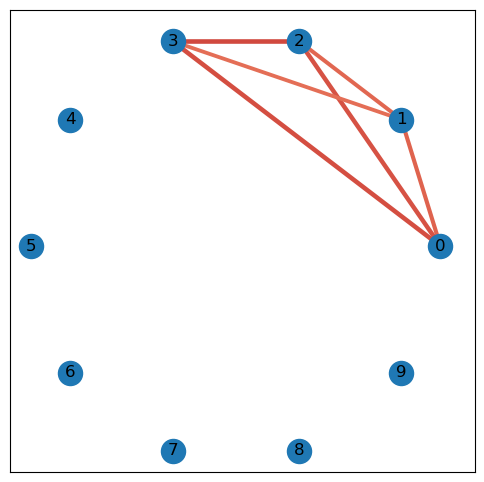

In [34]:
li1a = [[0,1,0.74], [0,2,0.8], [0,3, 0.82], [1,2,0.72], [1,3, 0.69], [2,3,0.83]]
FCU1a, df1a, G1a = FCU_generator(R, li1a)

### FCU 1b (subnetwork of  FCU 1)

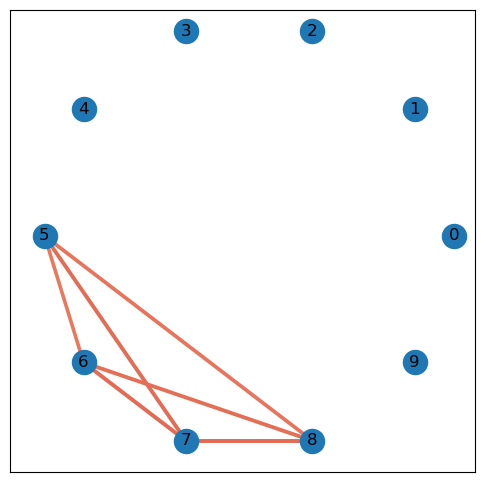

In [35]:
li1b = [[5,6, 0.65], [5,7, 0.7], [5,8,0.67], [6,7, 0.71], [6,8,0.69], [7,8, 0.71]]
FCU1b, df1b, G1b = FCU_generator(R, li1b)

### FCU 1 
Combine subnetworks 1a and 1b and add some small connection between other pairs of ROIs of the networks

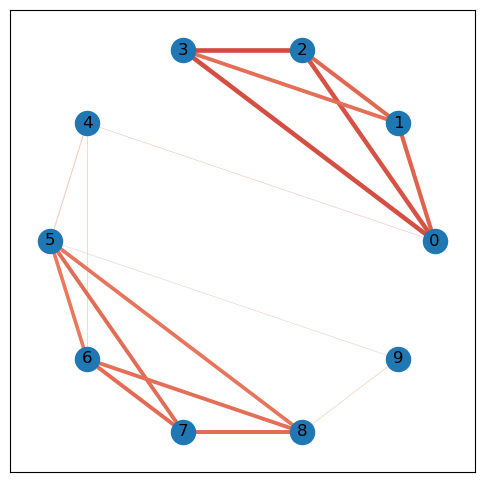

In [36]:
li1 = li1a + li1b +[[9,8, 0.13], [9, 5, 0.11],[4,6, 0.14], [4, 5, 0.19], [4, 0, 0.13]]
FCU1, df1, G1 = FCU_generator(R, li1)

### FCU 2a (subnetwork of  FCU 2)

In [37]:
li2a = [[0,1,0.72], [0,2,0.81], [0,3, 0.82], [1,2,0.67], [1,3, 0.68], [2,3,0.79], [9,0, 0.69], [9,1, 0.65], [9, 2, 0.66], [9, 3, 0.67]]

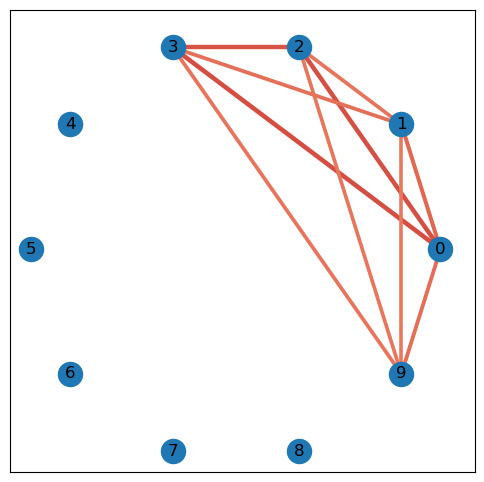

In [38]:
FCU2a, df2a, G2a = FCU_generator(R, li2a)

### FCU 2b (subnetwork of  FCU 2)

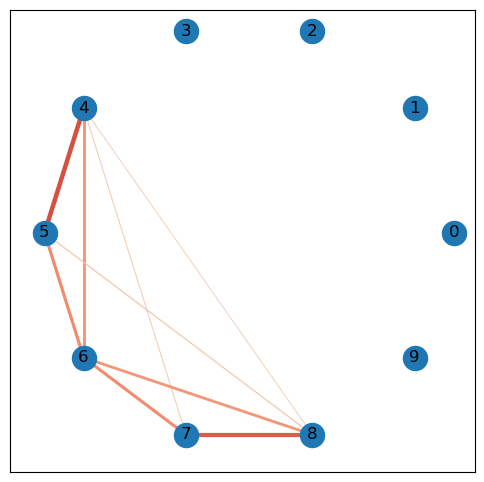

In [39]:
li2b = [[6,7, 0.56], [6,8, 0.51], [7,8, 0.76],[4,5,0.81], [4,6, 0.52], [5,6,0.57], [4,8,0.17], [4,7,0.19], [5,8,0.23]]
FCU2b, df2b, G2b = FCU_generator(R, li2b)

### FCU 2c (subnetwork of  FCU 2)

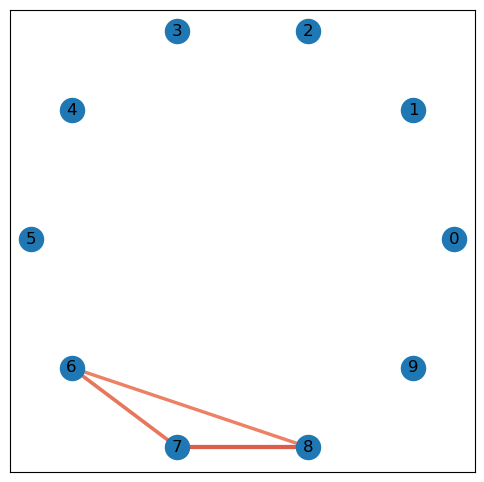

In [40]:
li2c = [[6,7, 0.66], [6,8, 0.61], [7,8, 0.76]]
FCU2c, df2c, G2c = FCU_generator(R, li2c)

### FCU 2d (subnetwork of  FCU 2)

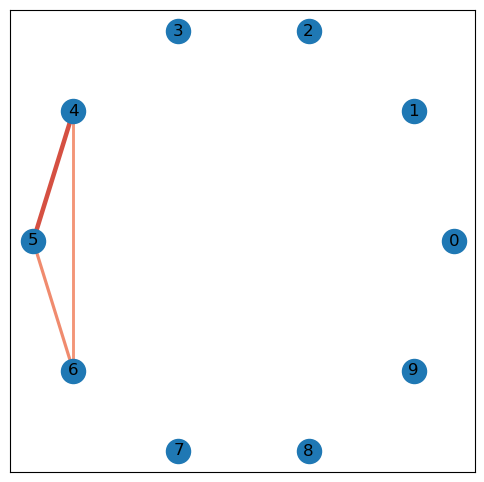

In [41]:
li2d = [[4,5,0.81], [4,6, 0.52], [5,6,0.57]]
FCU2d, df2d, G2d = FCU_generator(R, li2d)

### FCU 2

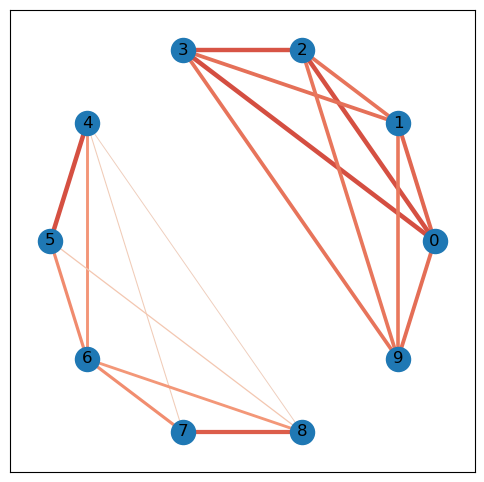

In [42]:
li2 = li2a + li2b
FCU2, df2, G2 = FCU_generator(R, li2)

### FCU 3a (subnetwork of  FCU 3)

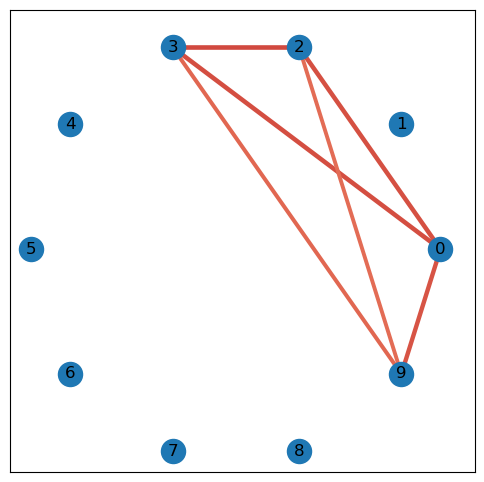

In [43]:
li3a = [[0,2,0.81], [0,3, 0.82],[0,9,0.79],[2,3,0.83],[2,9, 0.7], [3,9,0.72]]
FCU3a, df3a, G3a = FCU_generator(R, li3a)

### FCU 3b (subnetwork of  FCU 3)

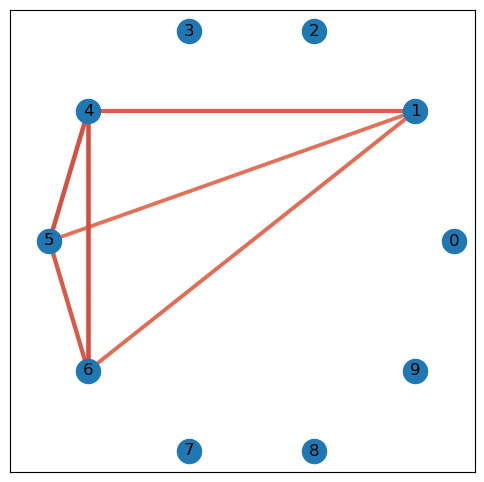

In [44]:
li3b=[[1,4, 0.75], [1,5,0.68], [1,6, 0.7], [4,5,0.81], [4,6, 0.82], [5,6,0.77]]
FCU3b, df3b, G3b = FCU_generator(R, li3b)

### FCU 3 

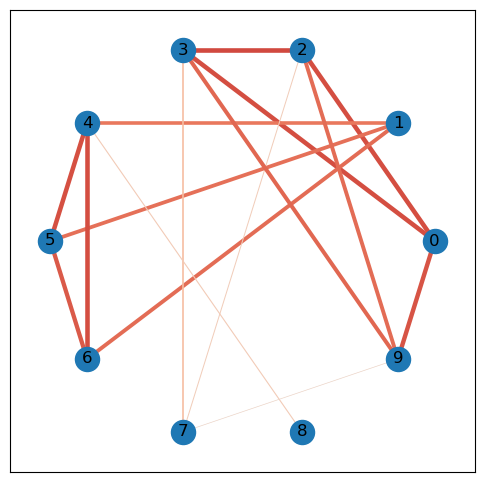

In [45]:
li3 = [[0,2,0.82], [0,3, 0.82],[0,9,0.79],[2,3,0.83],[2,9, 0.7], [3,9,0.72], [1,4, 0.65], [1,5,0.68], [1,6, 0.7], [4,5,0.81], [4,6, 0.82], [5,6,0.77], [3,7, 0.3], [4,8, 0.2], [9, 7,0.12], [2,7,0.18]]
FCU3, df3, G3 = FCU_generator(R, li3)

### Group the FCU to create $\mathbf{D}$

In [46]:
FCU_list = ["1" , "1a", "1b" , "2" , "2a" , "2b" , "2c" , "2d" , "3" , "3a" , "3b"]

#dictionary of networks as keys and subnewtorks as values (expressed as indexes of the FCU_list)
subnetwork_idx = {0: [1 , 2] , 3: [4 , 5 , 6 , 7] , 8: [9 , 10]  }

P = len(FCU_list)

D = np.zeros((int(R*(R-1)/2) , P))

idx = np.tril(np.ones((R, R)) , -1) > 0

for i , FCU in enumerate(FCU_list):
    pairs_list = eval("li"+FCU)
    C_FCU = np.zeros((R , R))
    for edge in pairs_list:
        C_FCU[edge[0] , edge[1]] = edge[2]
        C_FCU[edge[1] , edge[0]] = edge[2]
        
    D[: , i] = C_FCU[idx]

#create The support of D (the entries where D is nonzero)
D_tilde = D > 0

In [77]:
plt.rcParams.update({'font.size': 15})

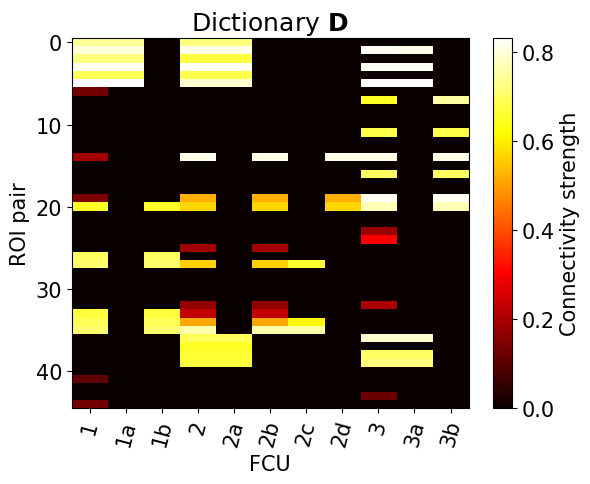

In [78]:
plt.figure()
plt.imshow(D, aspect = 'auto', interpolation = 'nearest', cmap = 'hot' )
plt.grid(False)
plt.colorbar(label = "Connectivity strength")
plt.xticks(np.arange(P) , FCU_list ,rotation =75);
plt.xlabel("FCU")
plt.ylabel("ROI pair")
plt.title(r"Dictionary $\mathbf{D}$");

# Creating the activation matrix $\mathbf{A}$

In [48]:
#initialization
A = np.zeros((P , T))

## Generate the support of A (when the FCUs are active)

In [49]:
#generate the activation probability at the start of the recording
p = 0.5#probability of a region to be active at the start of the recording
initial_states = np.random.default_rng().binomial(1, p, size= P)
A[: , 0] = initial_states

In [50]:
for i in range(P):
    #generate the change time indicies
    durations = np.ceil(np.random.default_rng().uniform(40, 150 , T//100))
    indices = np.cumsum(durations)
    indices = indices[indices< T]
    
    for j in range( 1 , T ):
        if (np.isin(j, indices)): #at transition
            A[i, j] = 1 - A[i , j-1] #if 0 become 1 and if 1 becomes 0
        else:
            A[i, j] = A[i , j-1]

#check that when a network is active, none of its subnetworks is active simultanously 

for i in range(T):
    for n in subnetwork_idx.keys():
        #if all the subnetworks are active, activate the network
        if np.all(A[subnetwork_idx[n] , i]):
            A[n , i] =1

        #if network active deactivate all its subnetworks
        if A[n, i] == 1:
            A[subnetwork_idx[n] , i] = 0
                  


#save the support of A
A_tilde =A.copy()


In [51]:
#remove too short activations
active_min = 20

transitions = np.abs(np.diff(A_tilde , axis =1 ,prepend = A_tilde[:,0 , np.newaxis]))
for p in range(P): #for each FCU
    change_idx = np.where(transitions[p, :])[0]
    Nb_change = len(change_idx)
    for i in range(Nb_change - 1): #discard last percept (stopped simulation)        
        idx = change_idx[i]
        active_time = change_idx[i+1] -change_idx[i]
        
        if active_time < active_min:
            A_tilde[p, idx:idx+active_time] = A_tilde[p , idx-1]

In [74]:
plt.rcParams.update({'font.size': 15})

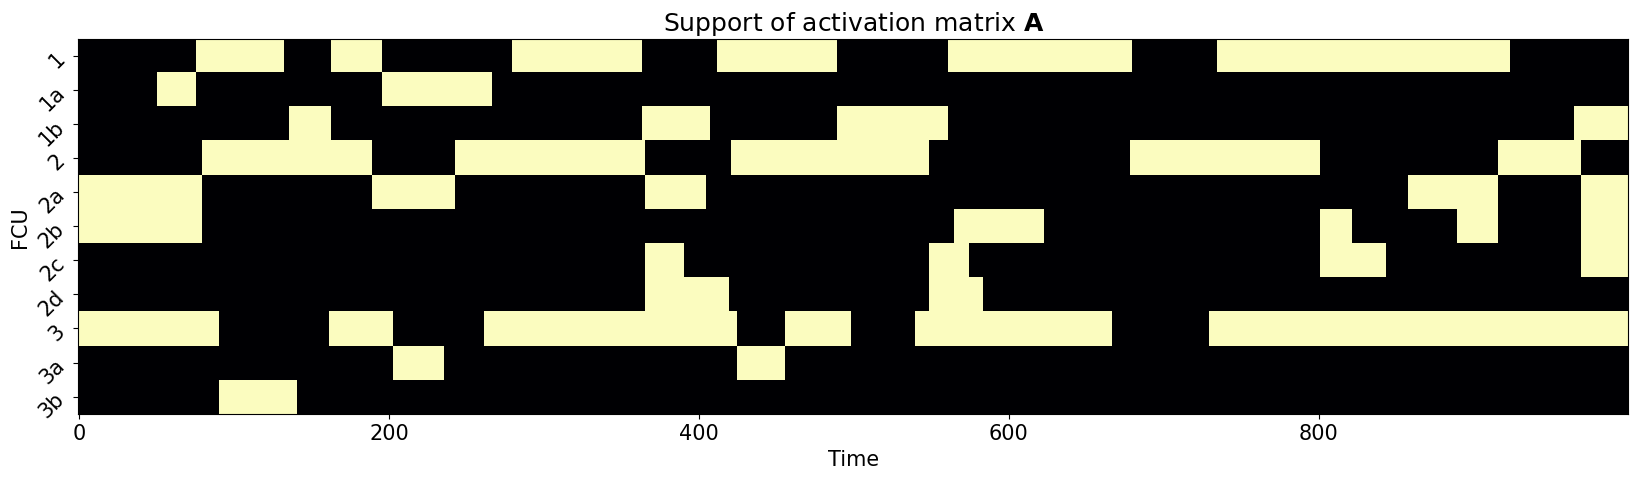

In [75]:
plt.figure(figsize=(20,7))
plt.imshow(A_tilde, aspect = 22, interpolation = 'nearest', cmap = 'magma')
plt.grid(False)
plt.xlabel("Time")
plt.ylabel("FCU")
plt.yticks(np.arange(P),FCU_list, rotation = 45)
plt.title("Support of activation matrix $\mathbf{A}$")
plt.show()

### Add variation to A

In [53]:
noise =  np.random.default_rng().normal(1, 0.5, size = (P, T))

#smoothing the noise
A_noise = denoise_tv_chambolle(noise, weight=10 , channel_axis=0) *A_tilde

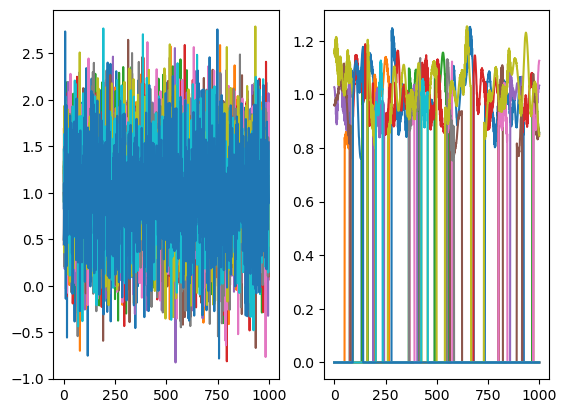

In [54]:
plt.figure()
plt.subplot(121)
plt.plot(noise.T);
plt.subplot(122)
plt.plot(A_noise.T);

### Enforce C < 1

Solve the optimization problem

$$\min_{A} ||A - A_{noise}||_{F}^{2}\\
\text{subject to} \quad DA \leq 0.9 \quad \text{and} \quad A \geq 0$$

Work on each colum of A separetly

In [55]:
def loss(A , A_noise):
    return np.linalg.norm(A - A_noise , ord= 2)**2 /2

def jac(A , A_noise):
    return A - A_noise

def hess(A, A_noise):
    return np.eye(A.shape[0])

cons1 = {'type':'ineq',
        'fun':lambda A , D : 0.9 - D@ A ,
        #'jac':lambda A , D , P, T: -D,
        'args': (D ,)}

cons2 = {'type':'ineq',
        'fun':lambda A: A,
        'jac':lambda A: np.eye(A.shape[0])}
        

opt = {"maxiter" : 3 ,  'disp':False}

In [56]:
A =np.zeros((P,T))

for i in range(T):
    res = sp.optimize.minimize(loss, A_noise[: , i] , args = A_noise[: , i], jac=jac , hess = None,
                           constraints= [cons1 , cons2], method= 'SLSQP', options=opt)

    A[: , i] = res.x


A = A * A_tilde

In [72]:
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Activation $\\mathbf{A}$')

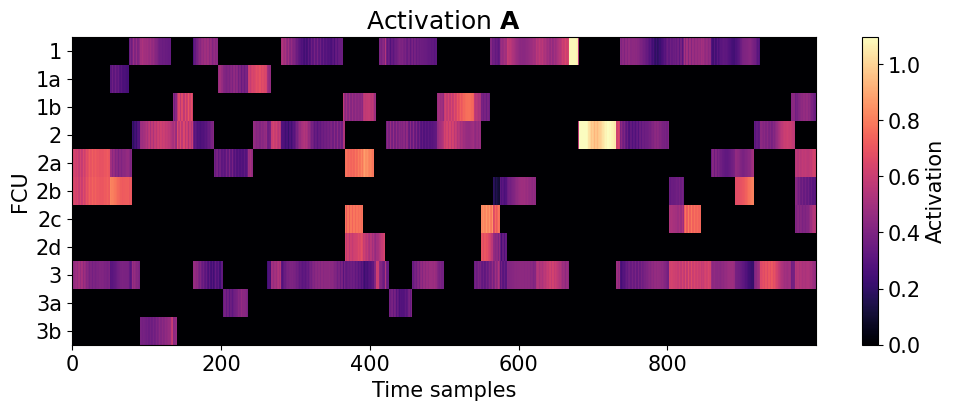

In [73]:
plt.figure(figsize =[12, 4])
plt.imshow(A, aspect = "auto", interpolation = 'nearest', cmap = 'magma')
plt.yticks(np.arange(P) , FCU_list );
plt.ylabel("FCU")
plt.xlabel("Time samples")
plt.grid(False)
plt.colorbar(label ="Activation" )
plt.title("Activation $\mathbf{A}$")

# Save A and D

In [37]:
#path = "simulation_A_D"
#np.savez(path , A = A , D = D)


# Compute C

In [63]:
C = D@A

In [64]:
plt.rcParams.update({'font.size': 30})

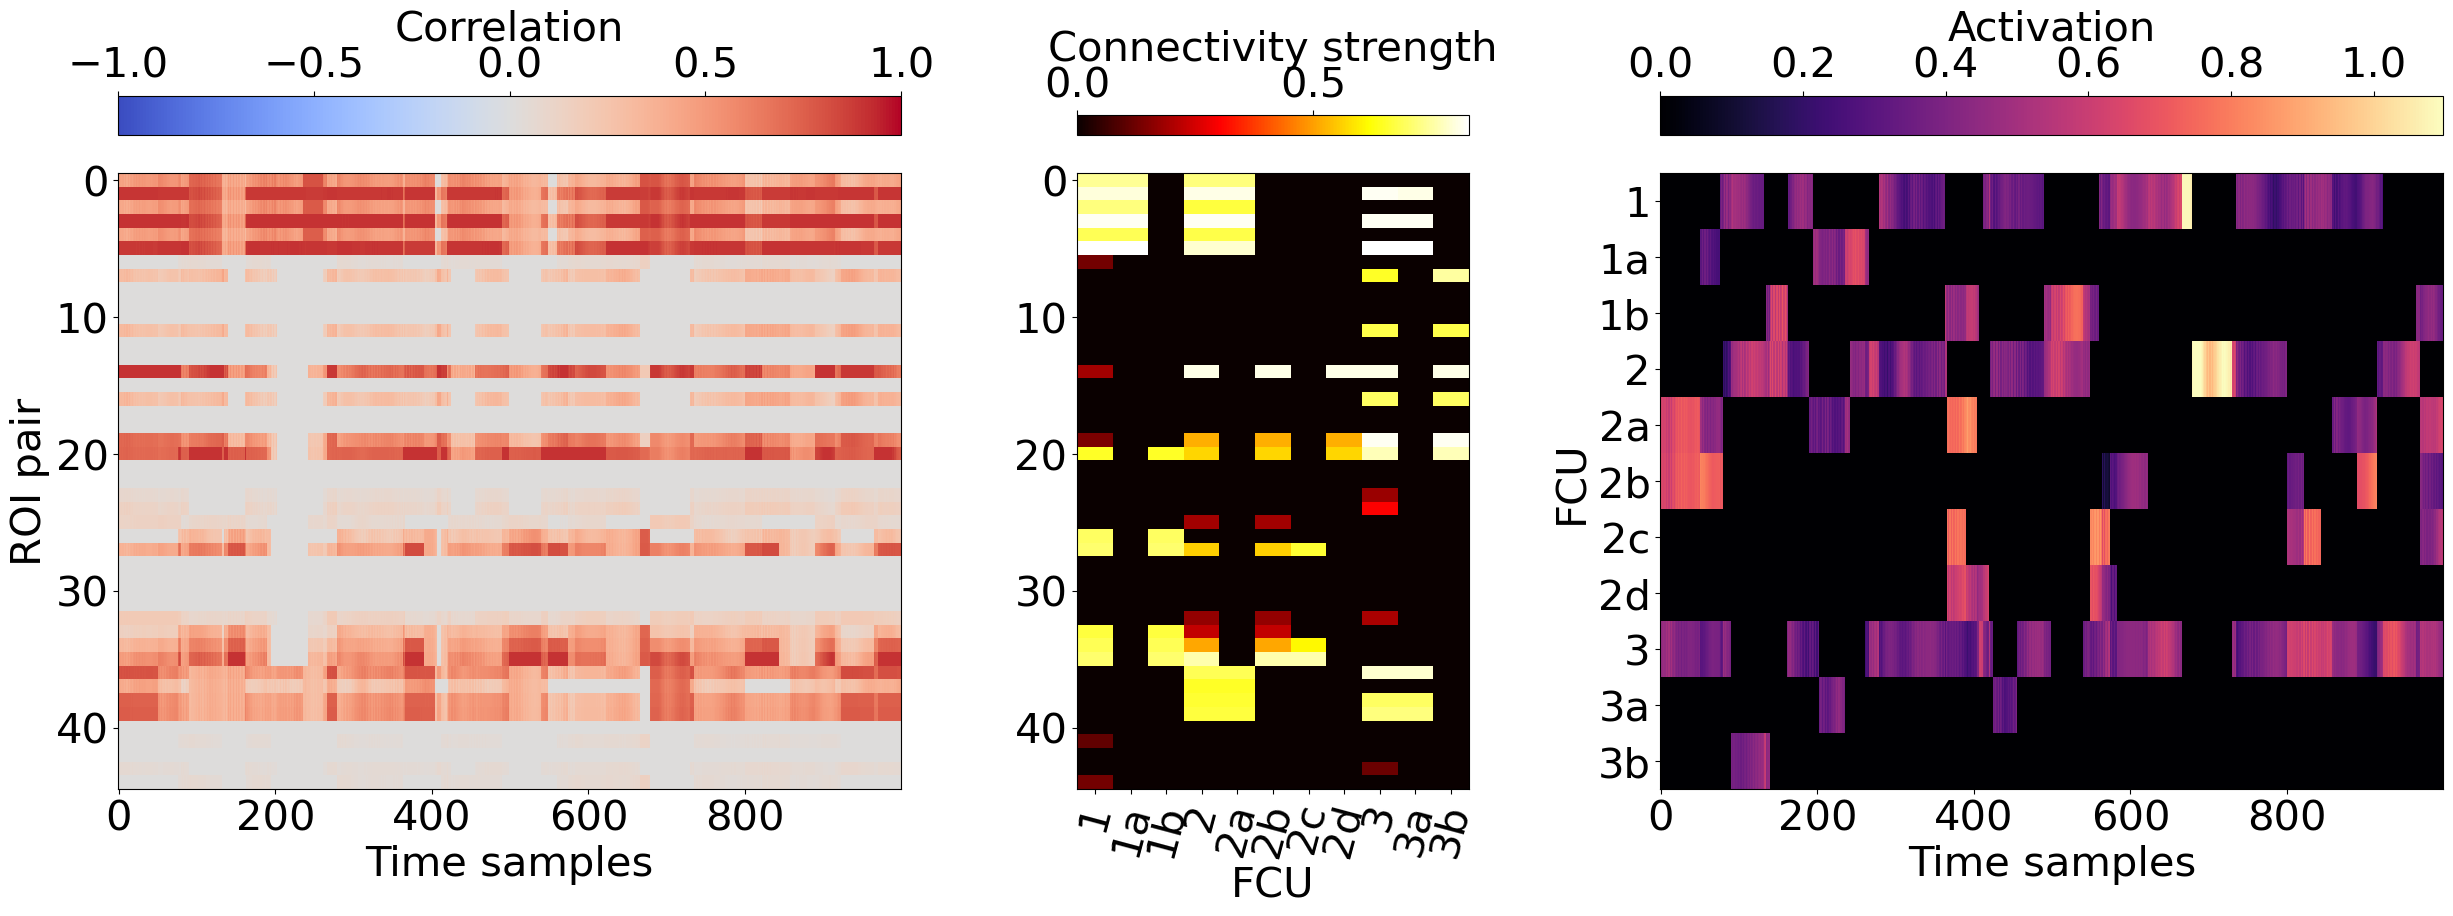

In [67]:
f, (a0,a3, a1, a4, a2) = plt.subplots(1, 5, gridspec_kw={'width_ratios': [5,0.1, 2.5, 0.2, 5]} , figsize =(30, 10))

a3.axis('off')
a4.axis('off')


imC = a0.imshow(C, aspect = 'auto', interpolation = 'nearest', cmap = 'coolwarm', vmin = -1, vmax = 1)
a0.set_ylabel("ROI pair")
a0.set_xlabel("Time samples")
f.colorbar(imC ,ax=[a0],location='top', label = "Correlation")


imD = a1.imshow(D, aspect = 'auto', interpolation = 'nearest', cmap = 'hot')
#a1.grid(False)
f.colorbar(imD,ax=[a1],location='top',  label="Connectivity strength")
a1.set_xticks(np.arange(P) , FCU_list ,rotation =75);
a1.set_xlabel("FCU")
#a1.set_ylabel("ROI pair")


imA = a2.imshow(A, aspect = "auto", interpolation = 'nearest', cmap = 'magma')
a2.set_yticks(np.arange(P) , FCU_list );
a2.set_ylabel("FCU")
a2.set_xlabel("Time samples")
#a2.grid(False)
f.colorbar(imA,ax=[a2],location='top', label ="Activation" );


#plt.savefig("figs/all_VT.pdf")

# ADD noise to C

In [6]:
def make_noise(C, rsb):
    P_c = np.sum(C**2)/np.prod(C.shape)
    sig_noise = P_c *10**(-rsb/10)
    
    C_noise = C + np.random.default_rng().normal(0, sig_noise, size = C.shape)
    C_noise[C_noise >= 1] = 0.99
    C_noise[C_noise <= -1] = -0.99
    return C_noise

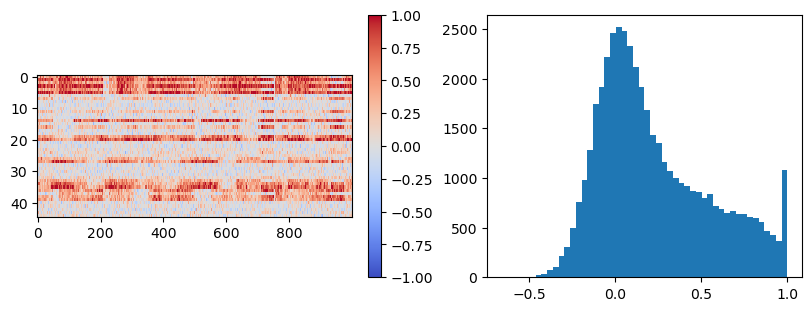

In [11]:
rsb = 0
C_noise = make_noise(C, rsb)
plt.figure(layout="constrained" , figsize=(8, 3))
plt.subplot(121)
plt.imshow(C_noise, aspect =10, interpolation = 'nearest', cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.grid(False)
plt.colorbar()
plt.subplot(122)
plt.hist(C_noise.flatten() , 50)
plt.show()